In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/final_feat_xtract.csv')
df.head()

,Mean,Variance,Kurtosis,Condition
0,-0.001143,0.009565,2.918599,Broken
1,0.000139,0.009390,1.002952,Broken
2,-0.000499,0.009427,1.173284,Broken
3,-0.000619,0.010212,1.152442,Broken
4,0.000247,0.009337,1.257100,Broken


In [ ]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mean       400 non-null    float64
 1   Variance   400 non-null    float64
 2   Kurtosis   400 non-null    float64
 3   Condition  400 non-null    object 
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
df['Condition'].value_counts()

Broken     200
Healthy    200
Name: Condition, dtype: int64

Text(0.5, 1.0, 'PLOT FOR CONDITION OF THE ROTOR')

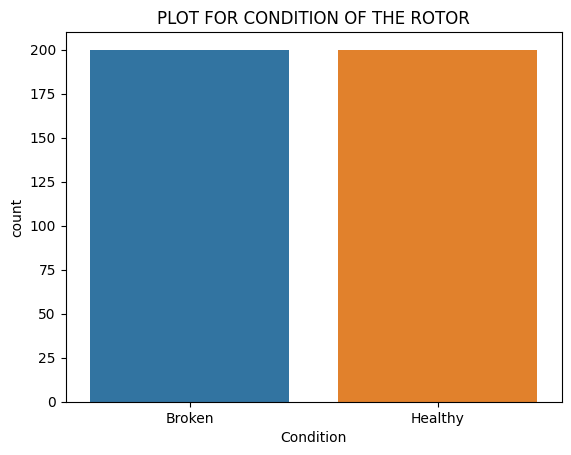

In [ ]:
sns.countplot(x=df["Condition"])
plt.title("PLOT FOR CONDITION OF THE ROTOR")

In [ ]:
df2 = df.drop(['Condition'],axis=1)
df2.head()

,Mean,Variance,Kurtosis
0,-0.001143,0.009565,2.918599
1,0.000139,0.009390,1.002952
2,-0.000499,0.009427,1.173284
3,-0.000619,0.010212,1.152442
4,0.000247,0.009337,1.257100


PLOTTING RELATIONSHIP BETWEEN MEAN AND THE CONDITION OF THE ROTOR

<Axes: xlabel='Condition', ylabel='Mean'>

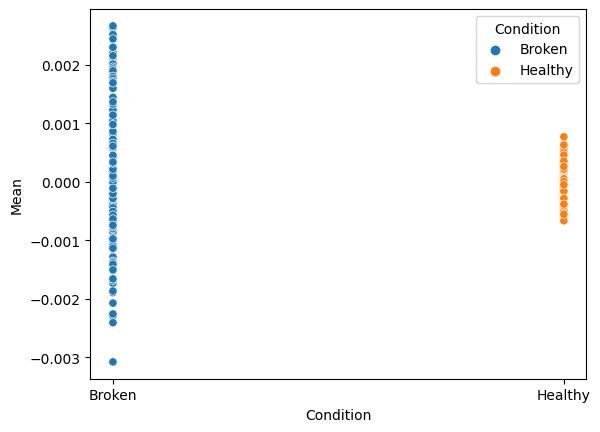

In [ ]:
sns.scatterplot(x=df['Condition'], y=df['Mean'], hue=df['Condition'])

PLOTTING RELATIONSHIP BETWEEN VARIANCE AND THE CONDITION OF THE ROTOR

<Axes: xlabel='Condition', ylabel='Variance'>

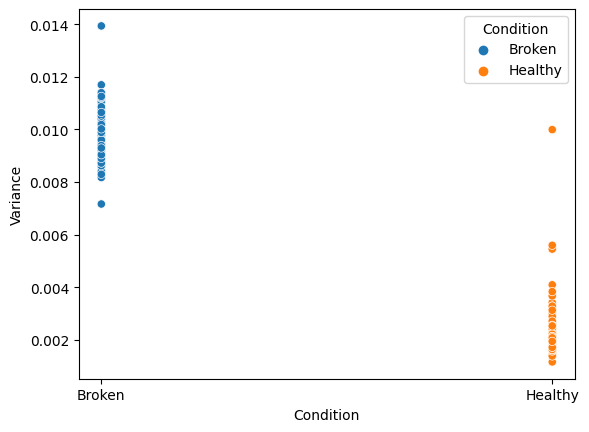

In [ ]:
sns.scatterplot(x=df['Condition'], y=df['Variance'], hue=df['Condition'])

PLOTTING RELATIONSHIP BETWEEN KURTOSIS AND THE CONDITION OF THE ROTOR

<Axes: xlabel='Kurtosis', ylabel='Variance'>

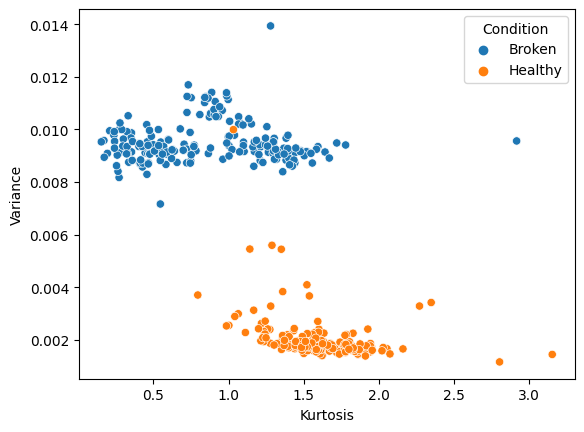

In [ ]:
sns.scatterplot(x=df['Kurtosis'], y=df['Variance'], hue=df['Condition'])

In [ ]:
x = df.drop(['Condition'],axis=1)
x.shape

(400, 3)

In [ ]:
x.head()

,Mean,Variance,Kurtosis
0,-0.001143,0.009565,2.918599
1,0.000139,0.009390,1.002952
2,-0.000499,0.009427,1.173284
3,-0.000619,0.010212,1.152442
4,0.000247,0.009337,1.257100


In [ ]:
y = df['Condition']
y.shape

(400,)

In [ ]:
y.head()

0    Broken
1    Broken
2    Broken
3    Broken
4    Broken
Name: Condition, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [ ]:
x_train.head()

,Mean,Variance,Kurtosis
80,-0.000653,0.009150,1.074058
198,-0.000070,0.001917,1.742460
262,-0.000606,0.009998,0.532925
329,-0.000253,0.001664,1.519367
157,0.000102,0.001653,1.910297


In [ ]:
x_test.head()

,Mean,Variance,Kurtosis
35,0.000731,0.010407,1.135258
316,0.000296,0.001558,1.741593
281,-0.002075,0.009069,0.584551
74,0.000144,0.009235,1.023200
296,-0.001508,0.009296,0.879934


In [ ]:
y_train.head()

80      Broken
198    Healthy
262     Broken
329    Healthy
157    Healthy
Name: Condition, dtype: object

In [ ]:
y_test.head()

35      Broken
316    Healthy
281     Broken
74      Broken
296     Broken
Name: Condition, dtype: object

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_LR=lr.predict(x_test)
y_LR


array(['Broken', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken',
       'Healthy', 'Broken', 'Healthy', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Healthy

[[44 12]
 [ 6 58]] 

0.85 

              precision    recall  f1-score   support

      Broken       0.88      0.79      0.83        56
     Healthy       0.83      0.91      0.87        64

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



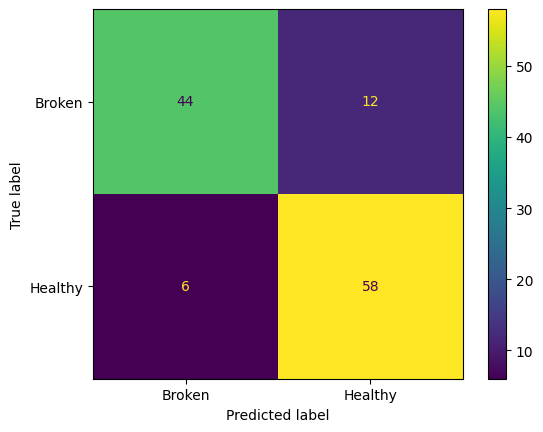

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
matrix_LR=confusion_matrix(y_test,y_LR)
print(matrix_LR,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_LR))
accuracy_LR=accuracy_score(y_test,y_LR)
print(accuracy_LR,'\n')
report_LR=classification_report(y_test,y_LR)
print(report_LR)

In [ ]:
lr.score(x_test,y_test)

0.85

K NEAREST NEGHIBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_KNN = KNN.predict(x_test)
y_KNN

array(['Broken', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken',
       'Healthy', 'Healthy', 'Healthy', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Broken', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Healthy', 

[[50  6]
 [ 7 57]] 

0.8916666666666667 

              precision    recall  f1-score   support

      Broken       0.88      0.89      0.88        56
     Healthy       0.90      0.89      0.90        64

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



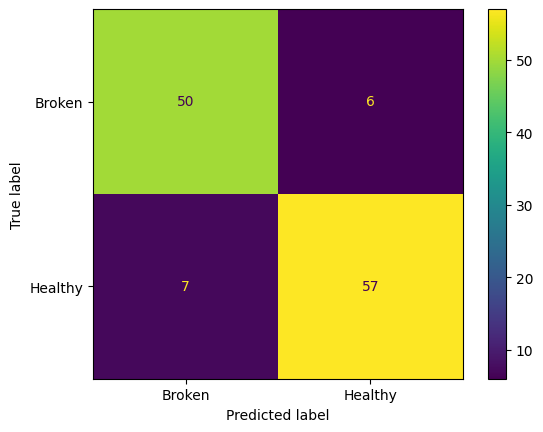

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
matrix_KNN=confusion_matrix(y_test,y_KNN)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_KNN))
accuracy_KNN=accuracy_score(y_test,y_KNN)
print(accuracy_KNN,'\n')
report_KNN=classification_report(y_test,y_KNN)
print(report_KNN)

In [ ]:
KNN.score(x_test,y_test)

0.8916666666666667

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_DT=DT.predict(x_test)
y_DT

array(['Broken', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Broken', 'Broken', 'Healthy', 'Broken', 'Broken',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Broken', 'Broken',
       'Healthy', 'Broken', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Broken', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Healthy', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Healthy', '

[[56  0]
 [ 1 63]] 

0.9916666666666667 

              precision    recall  f1-score   support

      Broken       0.98      1.00      0.99        56
     Healthy       1.00      0.98      0.99        64

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



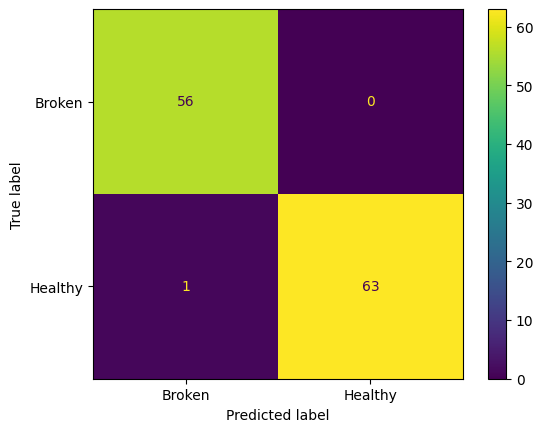

In [ ]:
matrix_DT=confusion_matrix(y_test,y_DT)
print(matrix_DT,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_DT))
accuracy_DT=accuracy_score(y_test,y_DT)
print(accuracy_DT,'\n')
report_DT=classification_report(y_test,y_DT)
print(report_DT)

In [ ]:
DT.score(x_test,y_test)

0.9916666666666667

In [ ]:
DT.predict([[-0.000124,0.008348,1.03065]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Broken'], dtype=object)

SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_SVM = SVM.predict(x_test)
y_SVM

array(['Broken', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Broken', 'Broken', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Healthy', 'Broken', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Broken', 'Broken', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Healthy', 'Broken', 'Broken', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Broken', 'Healthy',
       'Healthy', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Broken', 'Healthy', 'Healthy', 'Healthy', 'Broken',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Broken', 'Healthy', 'Healthy', 'Broken', 'Broken', 'Healthy',
       'Health

[[43 13]
 [ 6 58]] 

0.8416666666666667 

              precision    recall  f1-score   support

      Broken       0.88      0.77      0.82        56
     Healthy       0.82      0.91      0.86        64

    accuracy                           0.84       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120



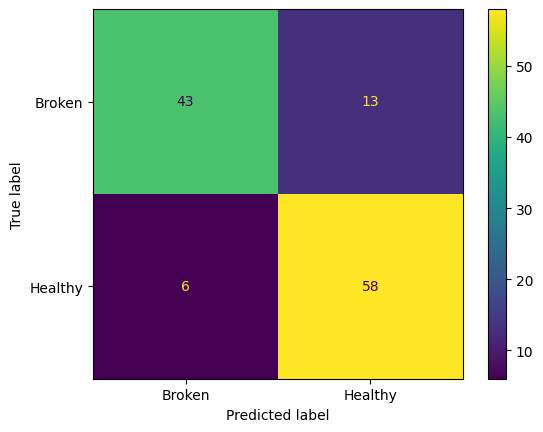

In [ ]:
matrix_SVM=confusion_matrix(y_test,y_SVM)
print(matrix_SVM,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_SVM))
accuracy_SVM=accuracy_score(y_test,y_SVM)
print(accuracy_SVM,'\n')
report_SVM=classification_report(y_test,y_SVM)
print(report_SVM)

In [ ]:
SVM.score(x_test,y_test)

0.8416666666666667

In [ ]:
algo = ['KNEARESTNEIGHBOUR','LOGISTIC REGRESSION','DECISION TREE','SUPPORT VECTOR MACHINES']
acc=[accuracy_KNN,accuracy_LR,accuracy_DT,accuracy_SVM]
Accuracy_Scores=pd.DataFrame({'Algorithms':algo, 'Accuracy': acc})
Accuracy_Scores['Accuracy']=Accuracy_Scores['Accuracy']*100
Accuracy_Scores


,Algorithms,Accuracy
0,KNEARESTNEIGHBOUR,89.166667
1,LOGISTIC REGRESSION,85.000000
2,DECISION TREE,99.166667
3,SUPPORT VECTOR MACHINES,84.166667


In [ ]:
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
2,DECISION TREE,99.166667
0,KNEARESTNEIGHBOUR,89.166667
1,LOGISTIC REGRESSION,85.000000
3,SUPPORT VECTOR MACHINES,84.166667


SAVING THE MODEL

In [ ]:
import joblib

In [ ]:
joblib.dump(DT,'decision.joblib')

['decision.joblib']

In [ ]:
model = joblib.load('decision.joblib')

In [ ]:
DT.predict([[-0.000124,0.008348,1.03065]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Broken'], dtype=object)